<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/Intro2NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install networkx  # Install NetworkX using pip

Code from Section II.C (NETS-3120).
Using NetworkX in Python...

In [1]:
import networkx as nx  # Import the networkx library
G = nx.Graph()         # Create an empty graph G
G.add_edge('1', '2')   # Add an edge between nodes 'A' and 'B'
print(G.nodes)         # Print the list of nodes in the graph
print(G.edges)         # Print the list of edges in the graph

['1', '2']
[('1', '2')]


Add more edges in the graph...

In [2]:
# prompt: Is there a relatively small graph example available in the NetworkX library?

G.add_edges_from([('2', '3'), ('3', '4'), ('4', '1'), ('1', '1')])
print(G.nodes)         # Print the list of nodes in the graph
print(G.edges)         # Print the list of edges in the graph

['1', '2', '3', '4']
[('1', '2'), ('1', '4'), ('1', '1'), ('2', '3'), ('3', '4')]


Plot the graph G

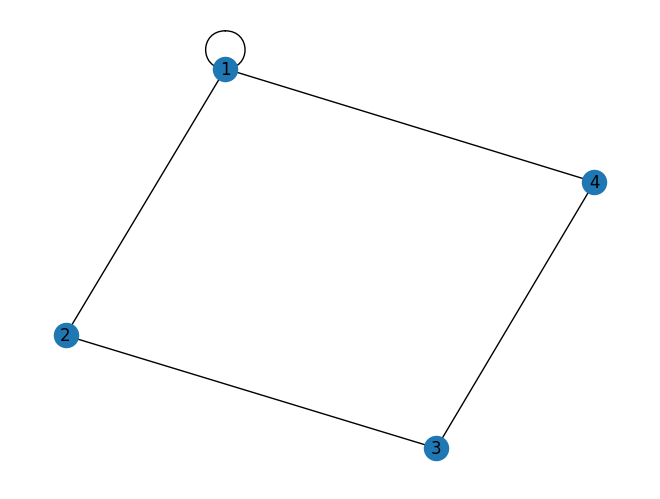

In [3]:
import matplotlib.pyplot as plt  # Import the Matplotlib library's pyplot module
nx.draw(G, with_labels=True)     # Use NetworkX to draw the graph 'G' with node labels
plt.show()                       # Display the plot created by Matplotlib

We can use several layouts to plot a graph.

Let's load a more complicated graph and plot it using several layouts.

The graph is the Zachary graph.

In [ ]:
# Load the Zachary's Karate Club graph
G = nx.karate_club_graph()

Let's draw this graph using a random layout...

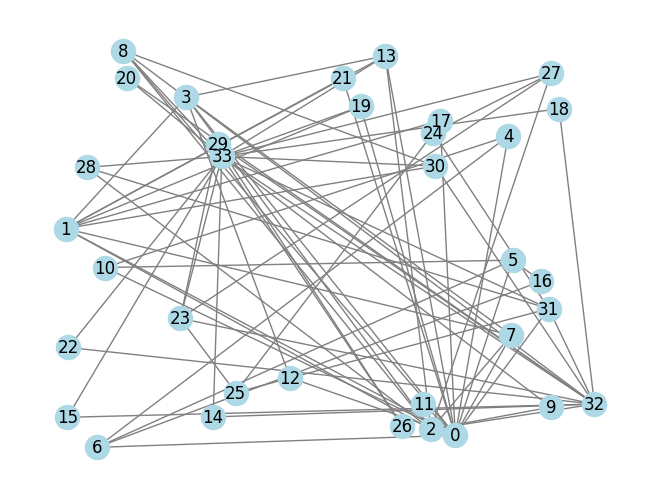

In [10]:
# Draw the graph using a random layout
pos = nx.random_layout(G)  # positions for all nodes placed randomly
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

# Show the plot
plt.show()

We can also use a circular layout...

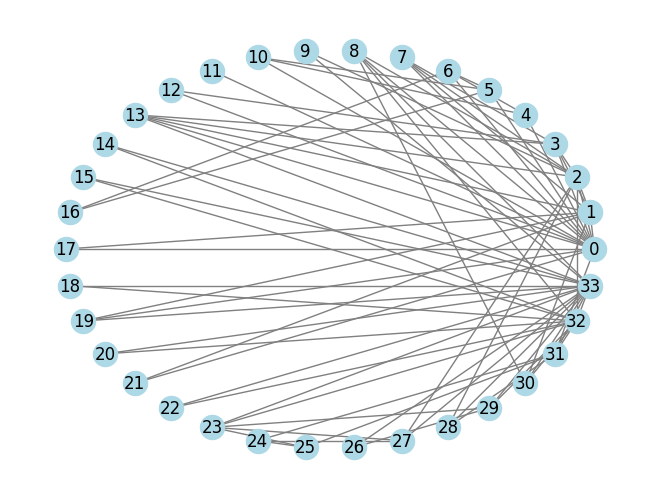

In [11]:
# Draw the graph using a circular layout
pos = nx.circular_layout(G)  # positions for all nodes in a circle
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

# Show the plot
plt.show()

Let's try the spectral layout...

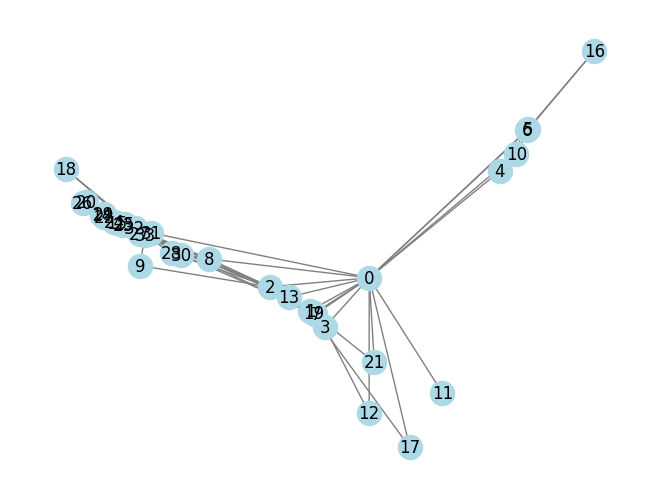

In [13]:
# Draw the graph using a spectral layout
pos = nx.spectral_layout(G)  # positions for all nodes using the spectral layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

# Show the plot
plt.show()

In [ ]:
Finally, the spring layout...

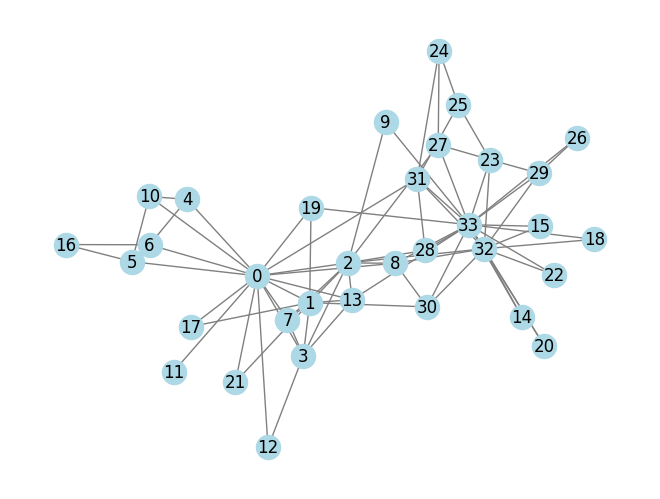

In [12]:
# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

# Show the plot
plt.show()

fferen

Let's dive into the various representation we have studied to represent this graph.

Let's start with the list of edges...

In [14]:
# Get the list of edges
edges = list(G.edges()) # This call the 'edges' method in the graph object 'G'. Then it convertes it into a list for easy visualization

# Print the edges
print(edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


Notice that, as usual in Python, the counting starts at 0. In other words, the first node in the graph is labeled with '0' (not '1')

Let's take a look at the adjacency list...

In [15]:
# Get the adjacency list of the graph, which shows each node's neighboring nodes
adjacency_list = G.adjacency() # This calls the 'adjacency' method in the object 'G'

# Iterate and print each node with its list of adjacent (neighboring) nodes
for node, neighbours in adjacency_list:
    print(f"{node}: {list(neighbours)}")

0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]
1: [0, 2, 3, 7, 13, 17, 19, 21, 30]
2: [0, 1, 3, 7, 8, 9, 13, 27, 28, 32]
3: [0, 1, 2, 7, 12, 13]
4: [0, 6, 10]
5: [0, 6, 10, 16]
6: [0, 4, 5, 16]
7: [0, 1, 2, 3]
8: [0, 2, 30, 32, 33]
9: [2, 33]
10: [0, 4, 5]
11: [0]
12: [0, 3]
13: [0, 1, 2, 3, 33]
14: [32, 33]
15: [32, 33]
16: [5, 6]
17: [0, 1]
18: [32, 33]
19: [0, 1, 33]
20: [32, 33]
21: [0, 1]
22: [32, 33]
23: [25, 27, 29, 32, 33]
24: [25, 27, 31]
25: [23, 24, 31]
26: [29, 33]
27: [2, 23, 24, 33]
28: [2, 31, 33]
29: [23, 26, 32, 33]
30: [1, 8, 32, 33]
31: [0, 24, 25, 28, 32, 33]
32: [2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33]
33: [8, 9, 13, 14, 15, 18, 19, 20, 23, 26, 27, 28, 29, 30, 31, 32, 22]


Finally, let's take a look at the adjacency matrix

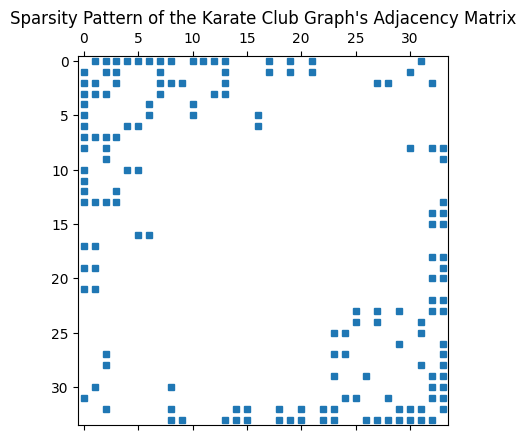

In [20]:
import numpy as np

# Get the adjacency matrix as a sparse matrix
adj_matrix = nx.adjacency_matrix(G)

# Use Matplotlib's spy function to plot the sparsity pattern of the adjacency matrix
plt.spy(adj_matrix, markersize=5)
plt.title("Sparsity Pattern of the Zachary Graph's Adjacency Matrix")
plt.show()

In this plot, the blue squares represent the location of the entries of the adjacency matrix in which the value is '1'.

Notice the symmetry of the matrix around the main diagonal. This is due to the fact that the matrix is undirected.

Let's play now with a directed graph. In particular,